In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [16]:
df = pd.read_csv('/content/sample_data/dataset-of-80s.csv')
df

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Walking Blues,Big Joe Williams,spotify:track:1ZjN5X8LmUB67pWPgimW3B,0.509,0.277,6,-14.323,1,0.0495,0.827000,0.002060,0.0756,0.640,101.157,161893,4,68.46530,7,0
1,Suddenly Last Summer,The Motels,spotify:track:4fLIM0B1WwrLux9RdnMvze,0.716,0.753,2,-5.682,1,0.0286,0.162000,0.030600,0.0831,0.561,120.141,222000,4,57.71583,11,1
2,Sanctuary,Béla Fleck,spotify:track:3DwlNfiCQSdj0GOxYkR9Rq,0.360,0.542,5,-13.885,1,0.0339,0.368000,0.165000,0.1160,0.803,116.831,444907,4,30.34574,17,0
3,The Wild Rover,The Pogues,spotify:track:6JyYNPLalPgGa7XnclF5FO,0.656,0.512,7,-11.872,1,0.0290,0.585000,0.000000,0.0720,0.880,97.500,157893,3,50.97022,7,0
4,In The Driver's Seat,John Schneider,spotify:track:6jJi8OXF5qaFdysB6sjWIT,0.642,0.889,2,-5.620,0,0.0494,0.375000,0.000000,0.1800,0.764,163.351,162293,4,33.62053,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6903,Bachke Rehna Re Baba - Pukar / Soundtrack Version,Kishore Kumar,spotify:track:2wK3g7TTQa9AJMKcuYKbon,0.443,0.589,7,-8.085,1,0.0392,0.552000,0.000000,0.1410,0.963,97.401,384360,4,31.61135,23,0
6904,Tiempos Metálicos,V8,spotify:track:3QaUanfuOovKQ5yNgGOSsz,0.208,0.750,9,-12.945,1,0.1080,0.000134,0.000002,0.0621,0.394,83.467,154827,4,23.71780,8,0
6905,Joy,Teddy Pendergrass,spotify:track:2Qv5EUATFNebcFGq3rN8O6,0.739,0.729,4,-9.694,0,0.0572,0.249000,0.007680,0.0690,0.884,103.339,375652,4,31.31730,13,1
6906,I Wanna Be A Cowboy,Boys Don't Cry,spotify:track:38mEFmht9K7UcpHvS9vtJG,0.749,0.626,0,-12.426,1,0.0393,0.011500,0.567000,0.0558,0.770,142.565,366133,4,27.71571,18,1


In [17]:
print("Shape of dataset:", df.shape)
print("\nMissing values:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)

Shape of dataset: (6908, 19)

Missing values:
 track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
dtype: int64

Data types:
 track                object
artist               object
uri                  object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
chorus_hit          float64
sections              int64
targ

In [18]:
print("\nClass distribution (0 = Flop, 1 = Hit):")
print(df['target'].value_counts())


Class distribution (0 = Flop, 1 = Hit):
target
0    3454
1    3454
Name: count, dtype: int64


In [19]:
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
       danceability       energy          key     loudness         mode  \
count   6908.000000  6908.000000  6908.000000  6908.000000  6908.000000   
mean       0.564258     0.608037     5.233353   -11.041894     0.687609   
std        0.173084     0.242962     3.597246     4.681166     0.463502   
min        0.065600     0.000276     0.000000   -39.940000     0.000000   
25%        0.455000     0.436000     2.000000   -13.451000     0.000000   
50%        0.582000     0.637000     5.000000   -10.662000     1.000000   
75%        0.690000     0.809000     9.000000    -7.640250     1.000000   
max        0.988000     1.000000    11.000000    -0.683000     1.000000   

       speechiness  acousticness  instrumentalness     liveness      valence  \
count  6908.000000   6908.000000       6908.000000  6908.000000  6908.000000   
mean      0.057906      0.293067          0.139863     0.201009     0.587922   
std       0.057768      0.302950          0.288144     0.181664

In [20]:
audio_features = [
    'danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness',
    'liveness', 'valence', 'tempo', 'duration_ms', 'chorus_hit', 'sections'
]

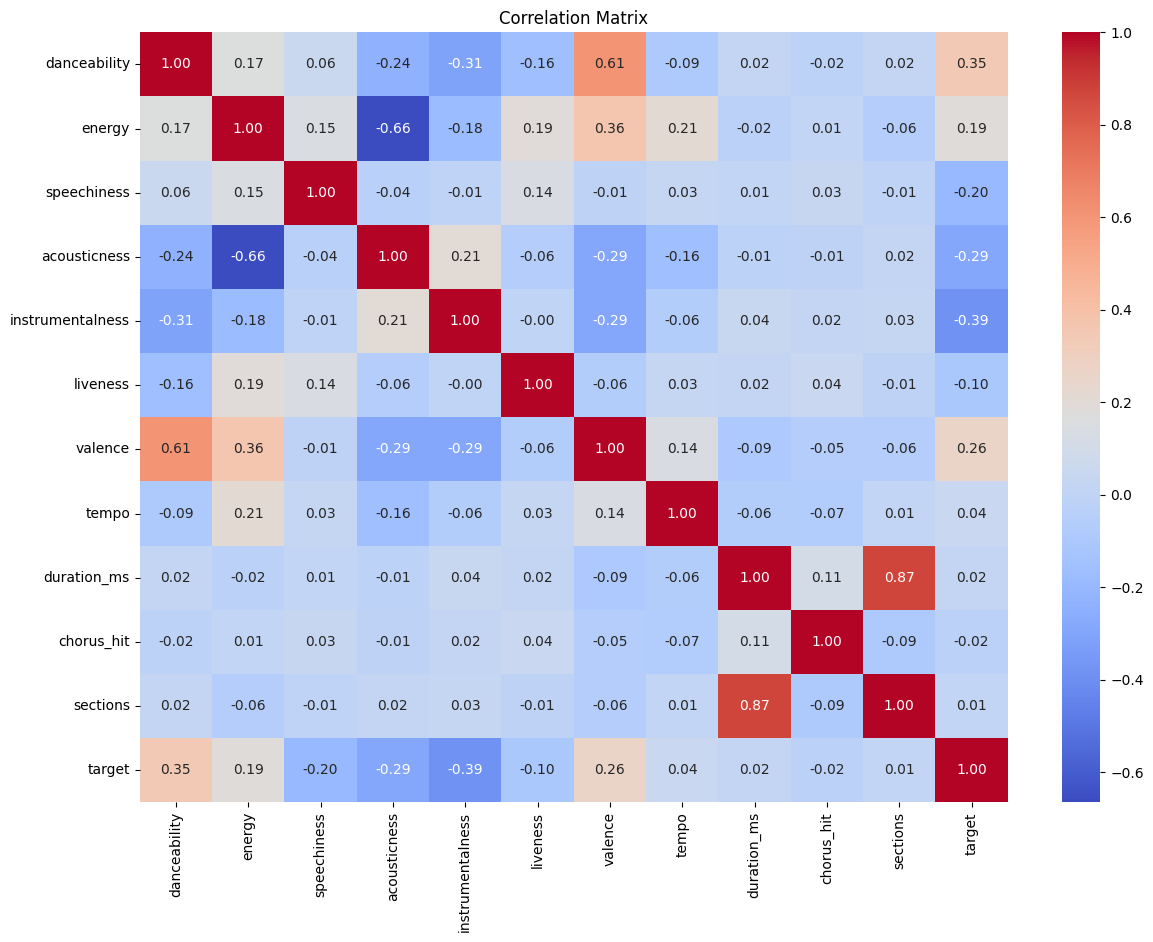

In [21]:
plt.figure(figsize=(14, 10))
corr = df[audio_features + ['target']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

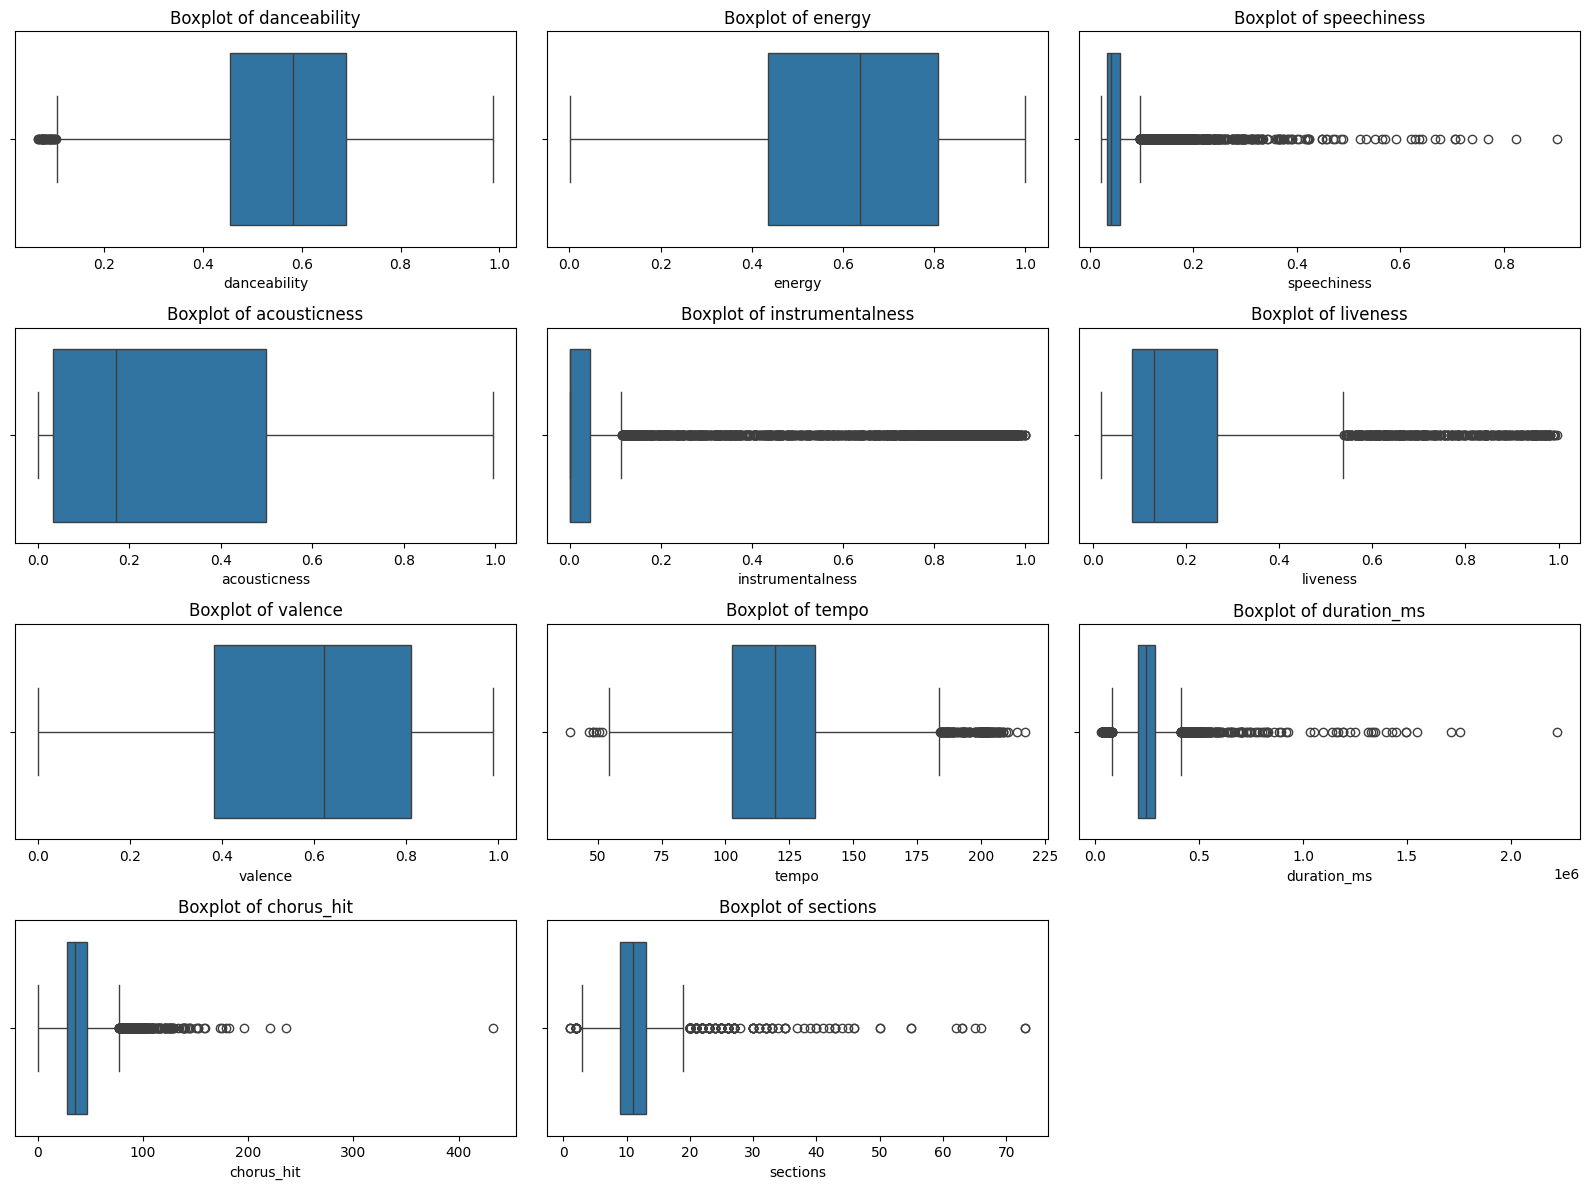

In [22]:
plt.figure(figsize=(16, 12))
for idx, col in enumerate(audio_features):
    plt.subplot(4, 3, idx + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [23]:
# Drop text-based or non-useful columns for modeling
df_cleaned = df.drop(columns=['track', 'artist', 'uri'])

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_scaled = scaler.fit_transform(df_cleaned.drop(columns=['target']))
df_scaled = pd.DataFrame(features_scaled, columns=df_cleaned.columns[:-1])
df_scaled['target'] = df_cleaned['target'].values


In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Compute VIF on scaled features
X = df_scaled.drop(columns=['target'])
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data.sort_values(by="VIF", ascending=False))


             feature       VIF
11       duration_ms  5.241257
14          sections  5.168691
1             energy  3.776859
3           loudness  2.568947
9            valence  1.962026
6       acousticness  1.922420
0       danceability  1.907245
7   instrumentalness  1.262453
13        chorus_hit  1.195081
10             tempo  1.137455
8           liveness  1.105866
5        speechiness  1.073234
12    time_signature  1.060253
4               mode  1.052823
2                key  1.037093


Random Forest Model Performance:
Accuracy: 0.7931
Precision: 0.7785
Recall: 0.8314
F1 Score: 0.8041


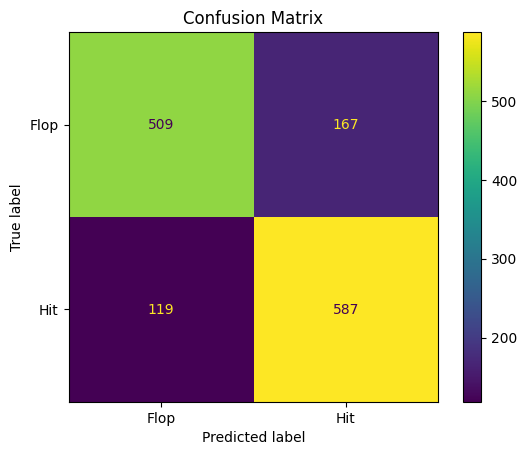

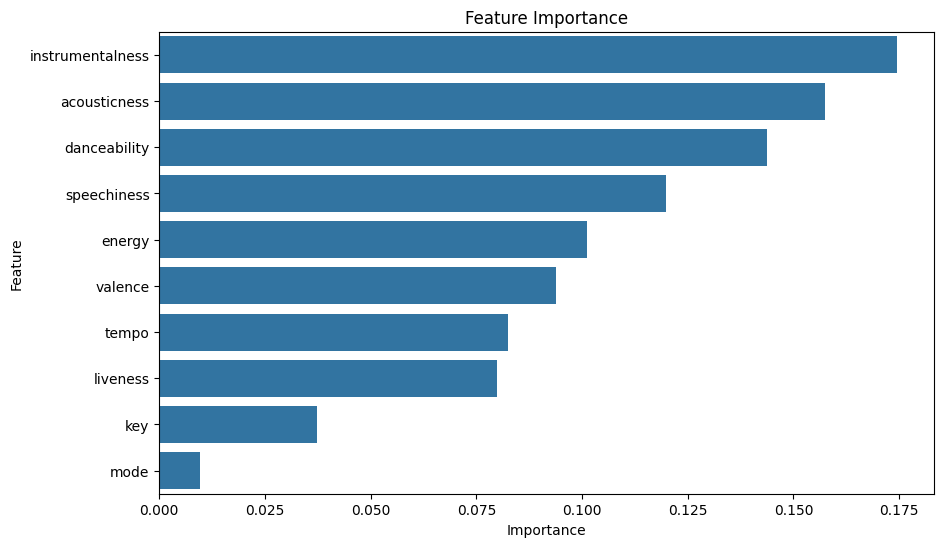

In [26]:
# Features and Target
X = df[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence', 'tempo', 'key', 'mode']]
y = df['target']

# Split into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Random Forest Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Flop", "Hit"])
disp.plot()
plt.title("Confusion Matrix")
plt.show()

# Feature Importance
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()